In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("C:/Users/anton/Downloads/height-weight.csv")
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


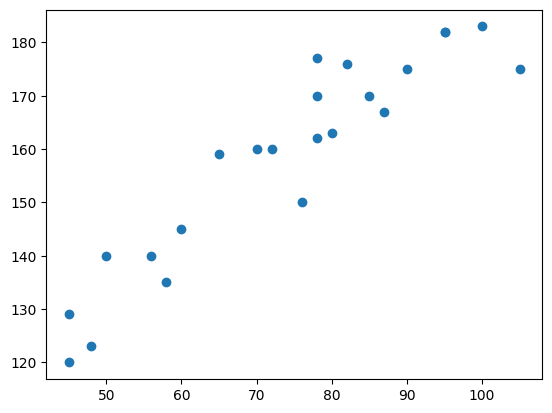

In [6]:
plt.scatter(df["Weight"],df["Height"])

In [48]:
X = df[["Weight"]]
y = df["Height"]

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [50]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train) # it applys the mean and standard deviation to calculate z score
X_test=scaler.transform(X_test) # it doesn't apply mean and standard deviation, it calculates z score atomatically

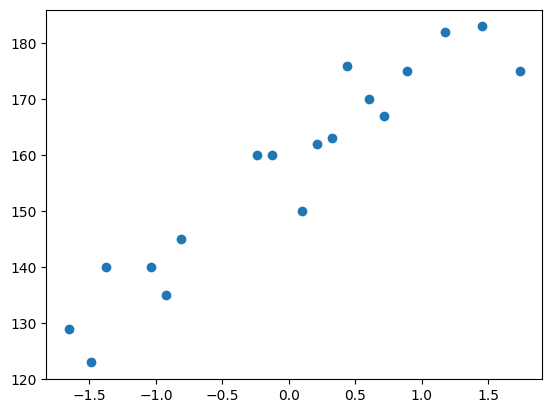

In [53]:
plt.scatter(X_train,y_train)

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
regression=LinearRegression()
regression.fit(X_train,y_train)


LinearRegression()

In [56]:
print("The slope or coefficient of weight is ",regression.coef_)
print("Intercept: ",regression.intercept_)

The slope or coefficient of weight is  [17.03440872]
Intercept:  157.5


## prediction of train data
1. y_pred_train = 157.5 + 17.03(X_train)

## prediction of test data
1. y_pred_test = 157.5 + 17.03(X_test)

In [57]:
y_pred=regression.predict(X_test)
y_pred

array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
       148.56507414])

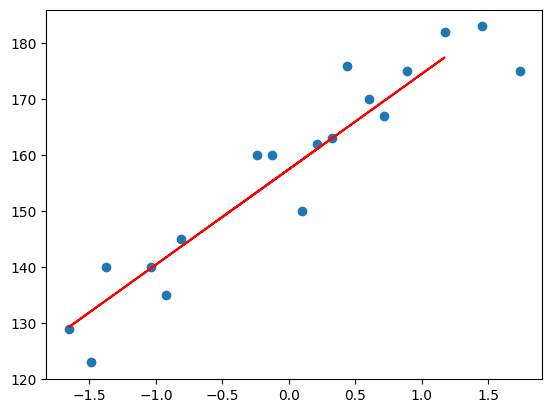

In [58]:
plt.scatter(X_train,y_train)
plt.plot(X_test,y_pred,'r')


In [59]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
r2_adjusted=1-((1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("mse: ",mse)
print("mae: ",mae)
print("rmse: ",rmse)
print("R2: ",r2)
print("r2_adjusted: ",r2_adjusted)



mse:  109.77592599051664
mae:  9.822657814519232
rmse:  10.477400726827081
R2:  0.776986986042344
r2_adjusted:  0.7026493147231252


## predicting new data

In [60]:
scaled_weight=scaler.transform([[80]]) # x value
y_pred_new_data=regression.predict(scaled_weight)
print("The height prediction for weight 80 kg is:",y_pred_new_data[0])


The height prediction for weight 80 kg is: 163.01076265919562


C:\Users\anton\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [64]:
residuals=y_test-y_pred
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

C:\Users\anton\AppData\Local\Temp\ipykernel_33760\3905197135.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


<Axes: xlabel='Height', ylabel='Density'>

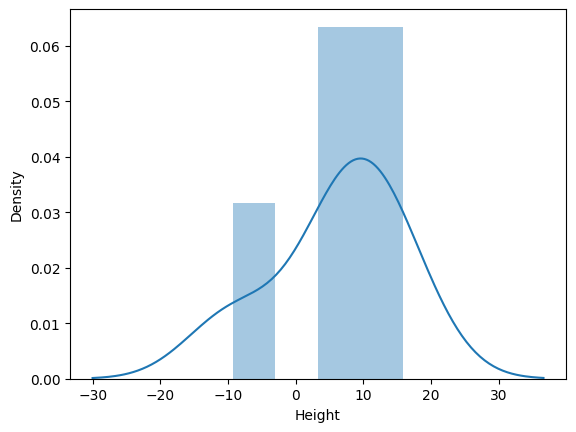

In [65]:
import seaborn as sns
sns.distplot(residuals,kde=True)

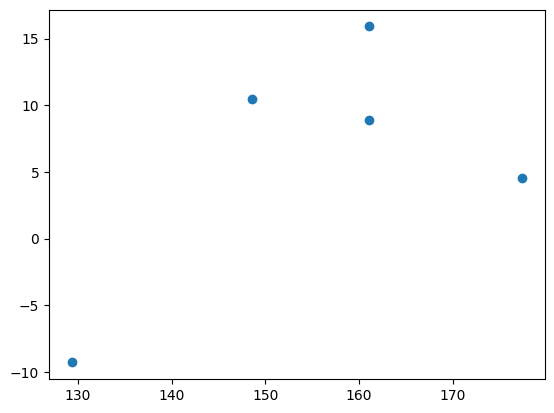

In [66]:
plt.scatter(y_pred,residuals)